In [3]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Problem parameters:
a = 0.4  # Thermal diffusivity
L = 1  # Length of the bar
n = 1  # Frequency of the sinusoidal initial conditions

def pde(x, y):
    """Expresses the PDE residual of the heat equation."""
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_t - a * dy_xx

# Computational geometry:
geom = dde.geometry.Interval(0, L)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Initial and boundary conditions:
bc = dde.icbc.NeumannBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(
    geomtime,
    lambda x: np.cos(np.pi * x[:, 0:1] / L),
    lambda _, on_initial: on_initial,
)

Distribución uniforme:

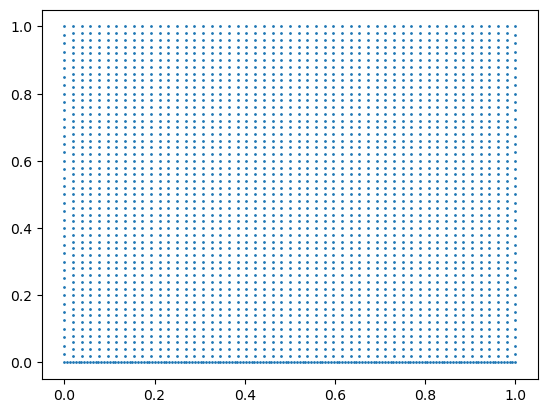

In [32]:
# Define the PDE problem and configurations of the network:
data = dde.data.TimePDE(
    geomtime,
    pde, # minimize residual
    [bc, ic],
    num_domain=2540,
    num_boundary=80,
    num_initial=160,
    train_distribution="uniform",
    num_test=2540,
)

tp = data.train_points()
plt.scatter(*zip(*tp), 1)

Puntos de test, cuya distribución no parece poder cambiarse:

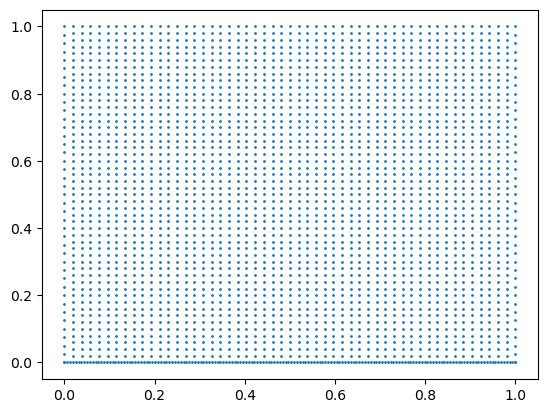

In [33]:
tt = data.test_points()
plt.scatter(*zip(*tt), 1)

Distribución uniforme de Train Points junto con los Test Points:

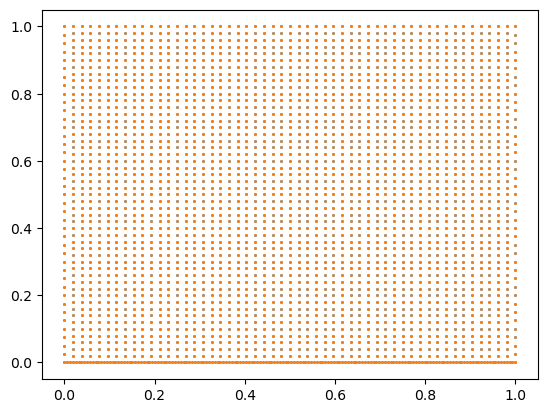

In [34]:
tp = data.train_points()
plt.scatter(*zip(*tp), 1)
tt = data.test_points()
plt.scatter(*zip(*tt), 1)

Distribución pseudorandom:

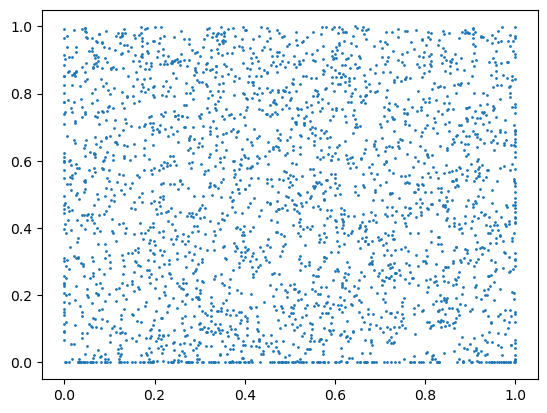

In [30]:
# Define the PDE problem and configurations of the network:
data = dde.data.TimePDE(
    geomtime,
    pde, # minimize residual
    [bc, ic],
    num_domain=2540,
    num_boundary=80,
    num_initial=160,
    train_distribution="pseudo",
    num_test=2540,
)

tp = data.train_points()
plt.scatter(*zip(*tp), 1)

Distribución LHS (Latin Hypercube Sampling), este tarda bastante más:

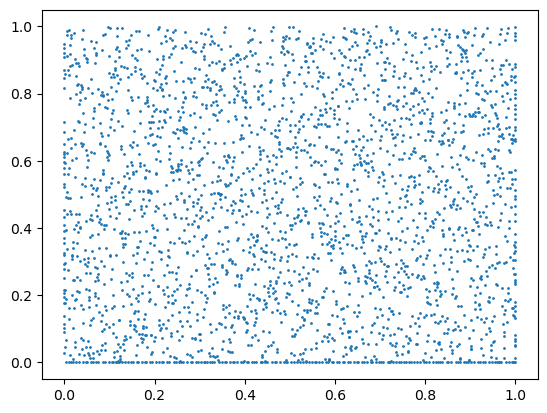

In [22]:
# Define the PDE problem and configurations of the network:
data = dde.data.TimePDE(
    geomtime,
    pde, # minimize residual
    [bc, ic],
    num_domain=2540,
    num_boundary=80,
    num_initial=160,
    train_distribution="LHS",
    num_test=2540,
)

tp = data.train_points()
plt.scatter(*zip(*tp), 1)

Distribución Halton:

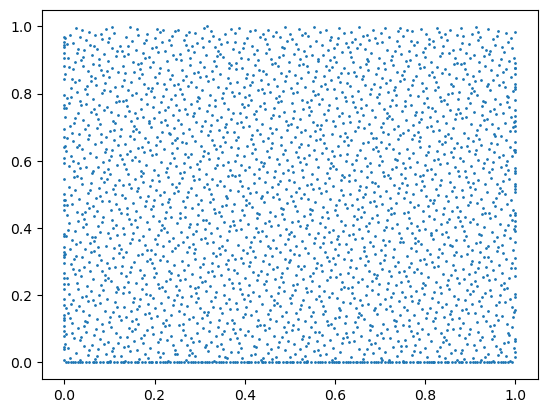

In [23]:
# Define the PDE problem and configurations of the network:
data = dde.data.TimePDE(
    geomtime,
    pde, # minimize residual
    [bc, ic],
    num_domain=2540,
    num_boundary=80,
    num_initial=160,
    train_distribution="Halton",
    num_test=2540,
)

tp = data.train_points()
plt.scatter(*zip(*tp), 1)

Distribución Hammersley (se usa por defecto en TimePDE):

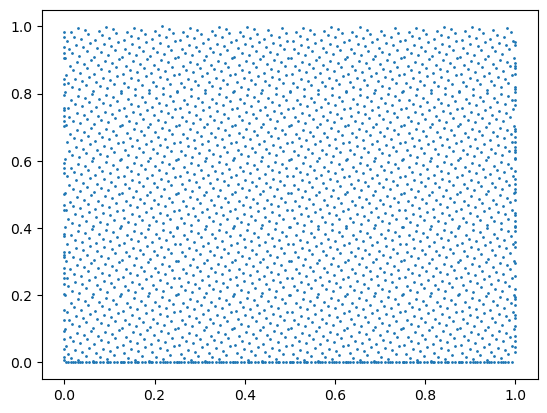

In [24]:
# Define the PDE problem and configurations of the network:
data = dde.data.TimePDE(
    geomtime,
    pde, # minimize residual
    [bc, ic],
    num_domain=2540,
    num_boundary=80,
    num_initial=160,
    train_distribution="Hammersley",
    num_test=2540,
)

tp_uniform = data.train_points()
plt.scatter(*zip(*tp_uniform), 1)

Distribución Sobol:

C:\Users\reloj\anaconda3\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2541=2541. 
  warnings.warn("The balance properties of Sobol' points require "
C:\Users\reloj\anaconda3\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+81=81. 
  warnings.warn("The balance properties of Sobol' points require "
C:\Users\reloj\anaconda3\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+161=161. 
  warnings.warn("The balance properties of Sobol' points require "


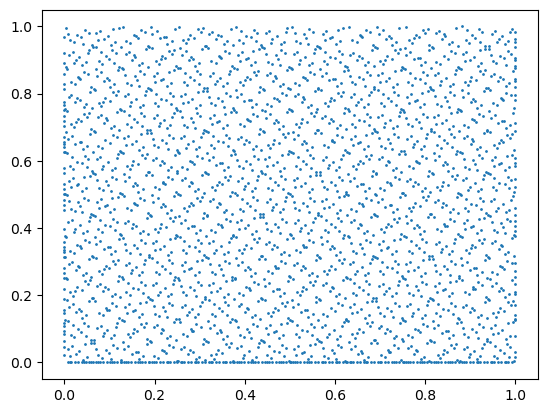

In [25]:
# Define the PDE problem and configurations of the network:
data = dde.data.TimePDE(
    geomtime,
    pde, # minimize residual
    [bc, ic],
    num_domain=2540,
    num_boundary=80,
    num_initial=160,
    train_distribution="Sobol",
    num_test=2540,
)

tp_uniform = data.train_points()
plt.scatter(*zip(*tp_uniform), 1)